# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Вы предобработали данные в SQL, и теперь они готовы для проверки гипотезы в Python. Загрузите данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности из файла yandex_knigi_data.csv. Если работаете локально, скачать файл можно по ссылке.

Проверьте наличие дубликатов в идентификаторах пользователей. Сравните размеры групп, их статистики и распределение.

Напомним, как выглядит гипотеза: пользователи из Москвы проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Проверка гипотезы в Python по Я.Книги: пользователи из СПБ проводят в среднем больше времени за чтением и прослушиванием книг, чем пользователи из Москвы 

- Автор: Котова Ольга
- Дата: 04.05.2025

## Цели и задачи проекта

<font color='#777778'> Цель проекта: проверить гипотезу о том, что пользователи из СПБ проводят в среднем больше времени за чтением и прослушиванием книг, чем пользователи из Москвы.
    
    
Задачи проекта:
1. проведние A/B-теста:
- выбор t-теста и уровень статистической значимости.
- получение результата теста, или p-value.  
    
2. Интерпретация результатов A/B-теста:
    
- Вывод на основе полученного p-value.
- Описание 1/2 возможных причин, объясняющих полученные результаты.
</font>

## Описание данных

<font color='#777778'>https://code.s3.yandex.net/datasets/yandex_knigi_data.csv - таблица данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности в Яндекс Книгах.

Таблица bookmate.audition содержит данные об активности пользователей и состоит из следующих полей:
- audition_id — уникальный идентификатор сессии чтения или прослушивания;
- puid — идентификатор пользователя;
- usage_platform_ru — название платформы, с помощью которой пользователь слушал контент;
- msk_business_dt_str — дата события в формате строки (московское время);
- app_version — версия приложения, которая использовалась для чтения или прослушивания;
- adult_content_flg — был ли это контент для взрослых: True или False;
- hours — длительность чтения или прослушивания в часах;
- hours_sessions_long — продолжительность длинных сессий чтения или прослушивания в часах;
- kids_content_flg — был ли это детский контент: True или False;
- main_content_id — идентификатор основного контента;
- usage_geo_id — идентификатор географического местоположения.

Таблица bookmate.content содержит данные о контенте и состоит из следующих полей:
- main_content_id — идентификатор основного контента;
- main_author_id — идентификатор основного автора контента;
- main_content_type — тип контента;
- main_content_name— название контента;
- main_content_duration_hours — длительность контента в часах;
- published_topic_title_list — список жанров контента.

Таблица bookmate.author содержит данные об авторах контента и состоит из следующих полей:
- main_author_id — идентификатор основного автора контента;
- main_author_name — имя основного автора контента.

Таблица bookmate.geo содержит данные о местоположении и состоит из следующих полей:
- usage_geo_id — идентификатор географического положения;
- usage_geo_id_name — город или регион географического положения;
- usage_country_name — страна географического положения.</font>

## Содержимое проекта

<font color='#777778'> 
    
1. Предобработка данных проведена в SQL.  
    
2. Загрузка и знакомство с данными  
   
3. Проверка наличия дубликатов в идентификаторах пользователей. 
    
4. Сравниие размеров групп, их статистики, визуализация.

5. Проверка гипотезы (пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы). 

Нулевая гипотеза  𝐻0:𝜇СПб≤𝜇Москва (Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве).

Альтернативная гипотеза  𝐻1:𝜇СПб>𝜇Москва  (Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо).

6. Составление анализической записки.

</font>

---

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# импортируем библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузка и занкомство с данными пользователей Мск и СПБ
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


При знакомстве с данными видим, что пропусков нет, везде по 8784 значения. Типы данных соответствующие. Теперь посмотрим наличие дубликатов.

In [3]:
# проверка дубликатов в идентификаторах пользователей, сохраняя первую встреченную строку
df.duplicated(subset='puid', keep='first').sum()



244

Дубликатов 244, удаляем их.

In [4]:
# удаляем дубликаты
df=df.drop_duplicates(subset='puid', keep='first')

print("\nКоличество строк без дубликатов:", len(df))


Количество строк без дубликатов: 8540


Теперь необходимо сравнить  размеры групп и их статистики - применим визуализации для наглядности.

In [5]:
msc_hours = df[df['city'] == 'Москва']['hours']

print("Количество пользователей в Москве:", len(msc_hours))

print("\nСтатистики пользователей Москвы:")
print(msc_hours.describe())


Количество пользователей в Москве: 6234

Статистики пользователей Москвы:
count    6234.000000
mean       10.881092
std        36.851683
min         0.000018
25%         0.059903
50%         0.924498
75%         5.939972
max       857.209373
Name: hours, dtype: float64


In [6]:
spb_hours = df[df['city'] == 'Санкт-Петербург']['hours']

print("Количество пользователей в Санкт-Петербурге:", len(spb_hours))

print("\nСтатистики пользователей Санкт-Петербурга:")
print(spb_hours.describe())

Количество пользователей в Санкт-Петербурге: 2306

Статистики пользователей Санкт-Петербурга:
count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
max       978.764775
Name: hours, dtype: float64


Количество пользователей в Москве: 6234, что значительно больше (почти втрое), чем в СПБ -2306, неравные группы могут не очень хорошо повлиять на анализ результатов. При этом, среднее значение в Мск и СПБ примерно равное (около 11), процентили также примерно равны, включая медиану (около 0.9). Максимум в Питере больше.

Посмотрим на распределение часов активности.

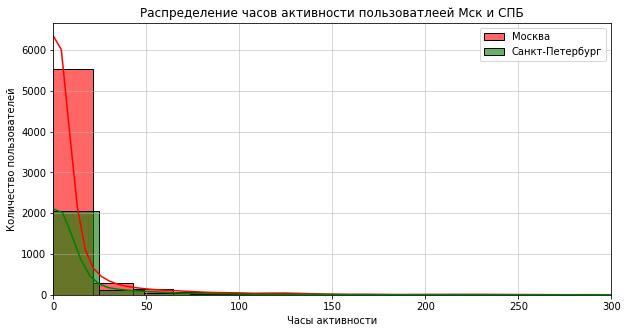

In [7]:
# визуализируем с помощью библиотеки seaborn
plt.figure(figsize=(10, 5))
sns.histplot(msc_hours, kde=True, color='red', label='Москва', alpha=0.6, bins=40)
sns.histplot(spb_hours, kde=True, color='green', label='Санкт-Петербург', alpha=0.6, bins=40)

plt.title('Распределение часов активности пользоватлеей Мск и СПБ')
plt.xlabel('Часы активности')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(True, which='both', linewidth=0.5)
plt.xlim(0, 300)
plt.show()

Распределение похожее в СПБ и Мск: у большинства пользователей активности не более 50 часов.

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [8]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(spb_hours, msc_hours, equal_var=False, alternative='greater')

print(f"T-статистика: {t_stat:.6f}")
print(f"P-value: {p_value:.6f}")


alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средняя активность пользователей в Санкт-Петербурге выше, чем в Москве.")
else:
    print("Не можем отвергнуть нулевую гипотезу: различия в средней активности пользователей не являются статистически значимыми.")

T-статистика: 0.402767
P-value: 0.343571
Не можем отвергнуть нулевую гипотезу: различия в средней активности пользователей не являются статистически значимыми.


## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

Выбран односторонний t-тест для двух независимых выборок с alternative='greater', уровень статистической значимости выбран стандартный (α = 0.05)

- Результат теста, или p-value.

P-value: 0.343571

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

P-value (примерно 0.3) больше уровня статистической значимости (α = 0.05), то есть имеющиеся различия между средними значениями часов активности в Мск и СПБ не являются статистически значимыми.

Не можем отвергнуть нулевую гипотезу, нет достаточных доказательств того, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.

- Одну или две возможные причины, объясняющие полученные результаты.

Возможной причиной можно назвать неравное количество пользователей в группах: в Москве их больше в 2.7 раза, чем в СПБ.
Различия в средней активности между двумя группами не являются статистически значимыми.


----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



Цель исследования: проверка гипотезы о том, что упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта.

Поскольку предыдущий аналитик уже провел тестирование, необходимо: 
- загрузить данные и оценить их целостность,  
- оценить корректность проведения теста,
- провести оценку результатов A/B-тестирования.

## 2. Загрузите данные, оцените их целостность.


In [9]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [10]:
participants.info()
participants.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [11]:
events.info()
events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


*Описание данных*:

https://code.s3.yandex.net/datasets/ab_test_participants.csv — таблица участников тестов.

Структура файла:
- user_id — идентификатор пользователя;
- group — группа пользователя;
- ab_test — название теста;
- device — устройство, с которого происходила регистрация.

https://code.s3.yandex.net/datasets/ab_test_events.zip — архив с одним csv-файлом, в котором собраны события 2020 года;

Структура файла:
- user_id — идентификатор пользователя;
- event_dt — дата и время события;
- event_name — тип события;
- details — дополнительные данные о событии.

Дополнительная информация по столбцу `details`


Числовые значения:


•	registration (регистрация) — стоимость привлечения клиента;  

•	purchase (покупка) — стоимость покупки.


В данных практически нет пропусков, пропуски в таблице с событиями в столбце  details  - допустимы, это лишь дополнительные данные о событии.  
Необходимо проверить также дубликаты и удалить их.


In [12]:
participants.duplicated(subset=['user_id', 'ab_test', 'group'], keep='first').sum()

0

In [13]:
events.duplicated(subset=['user_id', 'event_dt', 'event_name'], keep='first').sum()

39510

Дулбикаты отсутствуют среди участников, но есть среди событий, удалим их.

In [14]:
# удаляем дубликаты
events=events.drop_duplicates(subset=['user_id', 'event_dt', 'event_name'], keep='first')


In [15]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747776 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     747776 non-null  object        
 1   event_dt    747776 non-null  datetime64[ns]
 2   event_name  747776 non-null  object        
 3   details     241713 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 28.5+ MB


## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [16]:
all_test_users = participants[participants['ab_test'] == 'interface_eu_test']
print(f"Всего пользователей в тесте interface_eu_test: {all_test_users.shape[0]}")

Всего пользователей в тесте interface_eu_test: 10850


In [17]:
all_test_users

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
2,001064FEAAB631A1,A,interface_eu_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
...,...,...,...,...
14519,FFE600EEC4BA7685,B,interface_eu_test,Android
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC
14523,FFF28D02B1EACBE1,B,interface_eu_test,PC


In [18]:
gr_test_users=all_test_users.groupby('group')['user_id'].nunique().reset_index()
gr_test_users
    

,group,user_id
0,A,5383
1,B,5467


Text(0, 0.5, '')

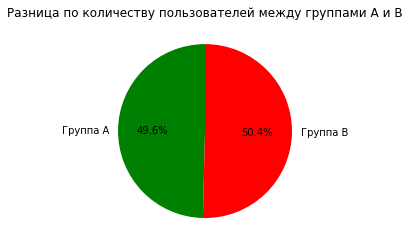

In [19]:
gr_test_users['user_id'].plot(
    kind='pie',  # Тип графика — круговая диаграмма
    autopct='%1.1f%%',  # Формат отображения процентов
    startangle=90,  # Начальный угол
    colors=['green', 'red'],  # Цвета секторов
    legend=False,  # Выключаем легенду
    labels=['Группа A','Группа B'])

# Настраиваем оформление графика
plt.title('Разница по количеству пользователей между группами A и B')
plt.ylabel('') 

В группах равное примерно количество пользователей, на диаграмме наглядно видно, что и процентое отношение примерно 50 на 50.

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [20]:
# сформируем датафрейм, где события будут только по тем пользователям, которые участвуют в interface_eu_test
test_events = events[events['user_id'].isin(all_test_users['user_id'])]

# присоединяем данные с участвующими в изучаемом тесте пользователями
test_events_gr = test_events.merge(all_test_users[['user_id', 'group']], on='user_id', how='left')
test_events_gr.head()


,user_id,event_dt,event_name,details,group
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,A
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,A
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,B
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,A
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,B


Text(0, 0.5, '')

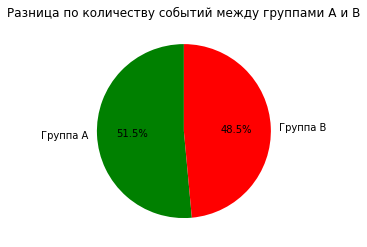

In [21]:
test_events_gr ['group']. value_counts().plot(
    kind='pie',  # Тип графика — круговая диаграмма
    autopct='%1.1f%%',  # Формат отображения процентов
    startangle=90,  # Начальный угол
    colors=['green', 'red'],  # Цвета секторов
    legend=False,  # Выключаем легенду
    labels=['Группа A','Группа B'])

# Настраиваем оформление графика
plt.title('Разница по количеству событий между группами A и B')
plt.ylabel('') 

По количеству событий также примерно равное распределение.

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [22]:
# формируем отдельный датафреймы, где будут только пользователи с датой регистрации (где есть событие "регистрация")
reg = test_events[test_events['event_name'] == 'registration'][['user_id', 'event_dt']]
# меняем наименование столбца на registration_dt, чтобы в дальнейшем использовать в формуле
reg.rename(columns={'event_dt': 'registration_dt'}, inplace=True)
# присоединяем столбец с датой регистрации
test_events_reg = test_events.merge(reg, on='user_id', how='left')

# считаем лайфтайм с использованием нового столбца в днях
test_events_reg['lifetime'] = (test_events_reg['event_dt'] - test_events_reg['registration_dt']).dt.days

# оставиляем только те события, которые произошли в течение первых 7 дней после регистрации
test_events_reg_7 = test_events_reg[(test_events_reg['lifetime'] >= 0) & (test_events_reg['lifetime'] <= 7)]

print(f"Количество событий в течение первых 7 дней: {test_events_reg_7.shape[0]}")

Количество событий в течение первых 7 дней: 65077


In [23]:
test_events_reg_7 = test_events_reg_7.merge(all_test_users[['user_id', 'group']], on='user_id', how='left')
test_events_reg_7['group']. value_counts()

B    33188
A    31889
Name: group, dtype: int64

Text(0, 0.5, '')

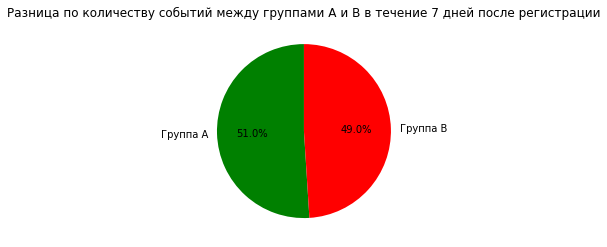

In [24]:
test_events_reg_7['group']. value_counts().plot(
    kind='pie',  # Тип графика — круговая диаграмма
    autopct='%1.1f%%',  # Формат отображения процентов
    startangle=90,  # Начальный угол
    colors=['green', 'red'],  # Цвета секторов
    legend=False,  # Выключаем легенду
    labels=['Группа A','Группа B'])

# Настраиваем оформление графика
plt.title('Разница по количеству событий между группами A и B в течение 7 дней после регистрации')
plt.ylabel('') 

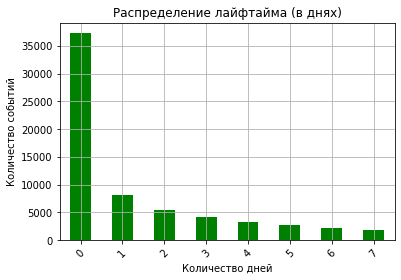

In [25]:
test_events_reg_7['lifetime'].value_counts().plot(
    kind='bar', color = 'green')
# Настройка графика
plt.title('Распределение лайфтайма (в днях)')
plt.xlabel('Количество дней')
plt.ylabel('Количество событий')
plt.xticks(rotation=45)  # Поворот меток по оси X для лучшей читаемости
plt.grid()

plt.show()

In [26]:
test_events_reg_7['lifetime'].value_counts()

0    37300
1     8084
2     5532
3     4100
4     3209
5     2720
6     2203
7     1929
Name: lifetime, dtype: int64

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [27]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

base_conversion_rate = 0.3  
mde = 0.1  
alpha = 0.05  
power = 0.8 

new_conversion_rate = base_conversion_rate * (1 + mde)

effect_size = proportion_effectsize(base_conversion_rate, new_conversion_rate)

power_analysis = NormalIndPower()
sample_size_per_group = power_analysis.solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    ratio=1
)

total_sample_size = sample_size_per_group * 2

print(f"Минимальный размер выборки для каждой группы: {int(sample_size_per_group)}")
print(f"Общий размер выборки: {int(total_sample_size)}")


Минимальный размер выборки для каждой группы: 3761
Общий размер выборки: 7523


У нас по количеству событий выборка составляет в группах А и B  - 31889 и 33188 соответсвенно. 
ПО количеству участиков выборка  по группе A	- 5383, по группе B - 5467.


Значит,  выборка достаточна для проведения теста. 

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [28]:
# формируем отдельный датафреймы, где будут только покупатели ('purchase')
purchasers = test_events_gr[test_events_gr['event_name'] == 'purchase']['user_id'].unique()
# присоединяем данные по всем пользователям - только тех, кто сделал покупку те, кто есть в датафрейме purchasers
test_purchase = all_test_users.copy()
test_purchase['made_purchase'] = test_purchase['user_id'].isin(purchasers)
# группируем данные
grouped_test_purchase = test_purchase.groupby('group').agg(
    total_count_users=('user_id', 'nunique'),
    purchasers=('made_purchase', 'sum')
).reset_index()
# посчитаем конверсию в покупку
grouped_test_purchase['conv']=grouped_test_purchase['purchasers']/grouped_test_purchase['total_count_users']
grouped_test_purchase

,group,total_count_users,purchasers,conv
0,A,5383,1766,0.32807
1,B,5467,1931,0.35321


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

По количеству числа пользователей контрольная группа А (3583) меньше тестовой группы В (5467), как и по числу покупателей. Покупателей в тестовой группе В больше на 165 пользователей. То же самое происходит с конверсией: в контрольной группе A конверсия составляет 32.81%, в тестовой группе B конверсия выше на 2.51% (35.32%).

Таким, образом, новый интерфейс положительно влияет на пользовательскую активность и способствует увеличению числа покупок.

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Будем использовать z-тест. Новый интерфейс - это группа B, значит проверяем нулевую гипотезу, что конверсия в группе В равна или меньше контрольной группы А.
Альтернативная гипотеза: в тестовой группе В конверсия выше, чем в группе А (аlternative='larger').

H₀: p_B ≤ p_A
H₁: p_B > p_A



In [29]:
from statsmodels.stats.proportion import proportions_ztest

success = [1931, 1766]  
total_count_users = [5467, 5383]  

z_stat, p_value = proportions_ztest(success, total_count_users, alternative='larger')
alpha=0.05

print(f"Z-статистика: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Различие в конверсии статистически значимо.")
else:
    print("Не можем отвергнуть нулевую гипотезу. Различие в конверсии статистически незначимо.")

Z-статистика: 2.76
P-value: 0.0029
Отвергаем нулевую гипотезу. Различие в конверсии статистически значимо.


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

P-value: 0.0029, что меньше уровня значимости α = 0.05. Отклоняем нулевую нулевую гипотезу. Различие в конверсии является статистически значимым.

Рекомендуется внедрить новый интерфейс для всех пользователей, так как он значительно улучшает конверсию.

Было заявлено, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта. По результатм исследования в тестовой группе B конверсия выше на 2.51% (при округлении на 3 процентных пункта и это различие статистически значимо.
